In [16]:
#차원축소 PCA (벡터 좌표만으로 선형 그래프 표현)
#원본데이터를 주성분에 투영
#2차원 데이터를 1차원으로... 10000개의 데이터를 단순화한다 (중간에 놓침)

In [3]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA #주성분 분석?
pca = PCA(n_components=50) #10000개의 특성을 50개로 줄인다.
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
pca.components_.shape #완료 : 검증

(50, 10000)

In [14]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10)) #올림이엇다아ㅏㅇ
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

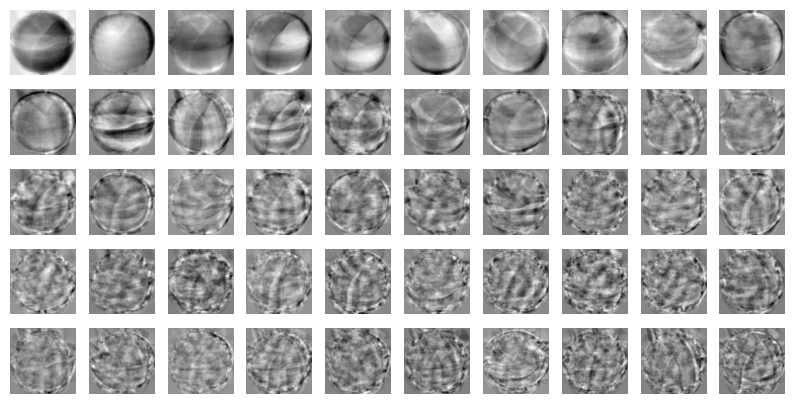

In [15]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [17]:
fruits_2d.shape

(300, 10000)

In [18]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [20]:
fruits_inverse = pca.inverse_transform(fruits_pca) #원상복귀
fruits_inverse.shape

(300, 10000)

In [21]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

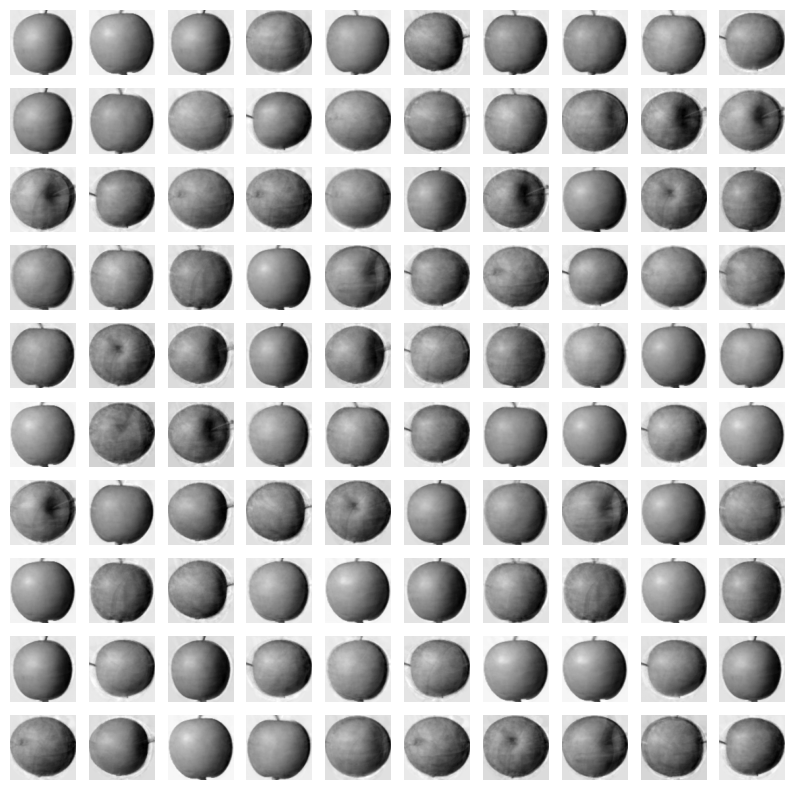

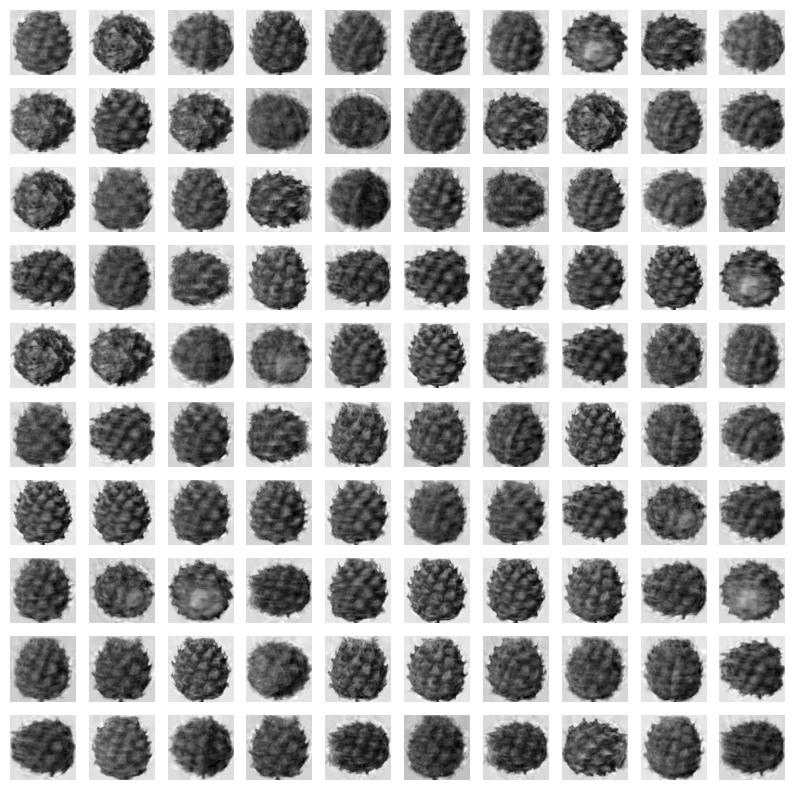

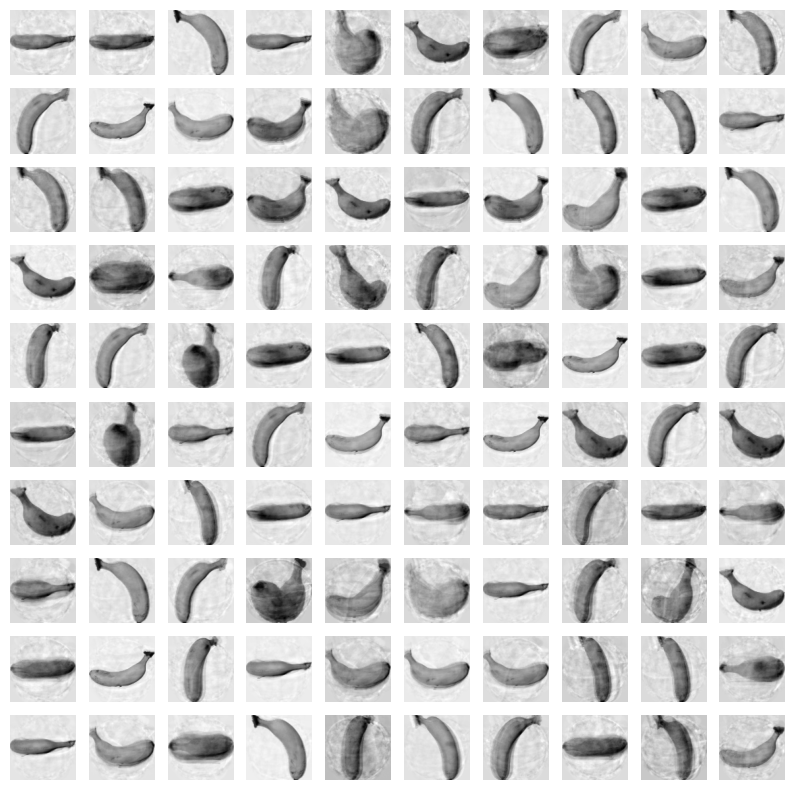

In [22]:
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n') #복원작업하며 노이즈 생김

In [23]:
#설명된 분산

In [25]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447832, 0.00437317, 0.00408037, 0.0038947 , 0.00372439,
       0.00359279, 0.0033144 , 0.00317837, 0.00304337, 0.00303755,
       0.00288884, 0.00275885, 0.0026478 , 0.00255926, 0.00252019,
       0.00247316, 0.00239671, 0.00230931, 0.00222198, 0.002169  ,
       0.00213456, 0.00195977, 0.00192201, 0.0019057 , 0.00185488,
       0.00182869, 0.00173987, 0.00165909, 0.0016277 , 0.00158843])

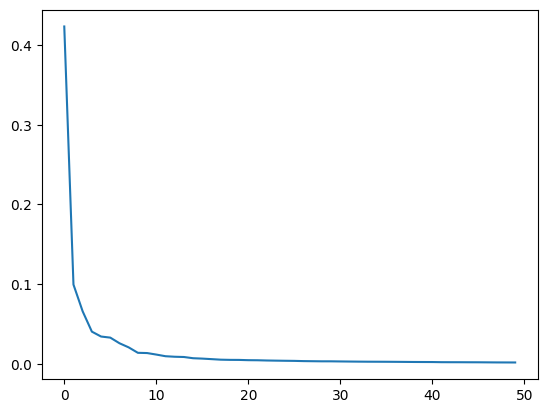

In [26]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target) #10000개 특성 속도
scores

{'fit_time': array([0.16910458, 0.12174845, 0.12278652, 0.13917756, 0.14927697]),
 'score_time': array([0.00199986, 0.00199485, 0.00600004, 0.00100017, 0.00300026]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [31]:
scores = cross_validate(lr, fruits_pca, target) #50개 특성 속도
scores

{'fit_time': array([0.00499916, 0.00599957, 0.00399995, 0.00399995, 0.00899911]),
 'score_time': array([0.        , 0.        , 0.        , 0.00100017, 0.00100112]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [33]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [37]:
pca.n_components_

np.int64(2)

In [38]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape #정확도?가 50%가 넘는 2개의 특성을 가지는 shape으로 transform

(300, 2)

In [86]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))

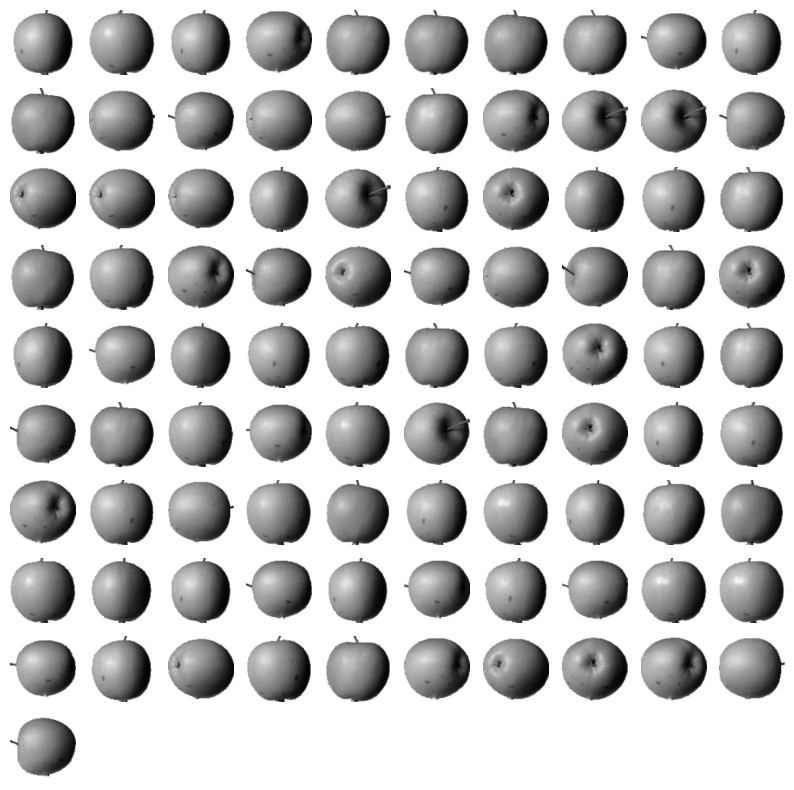

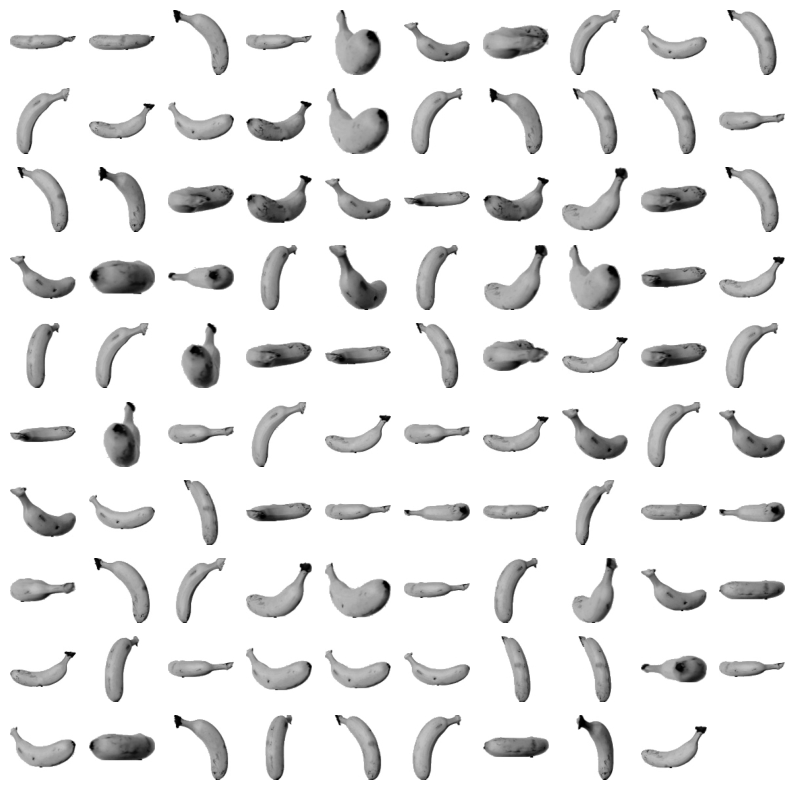

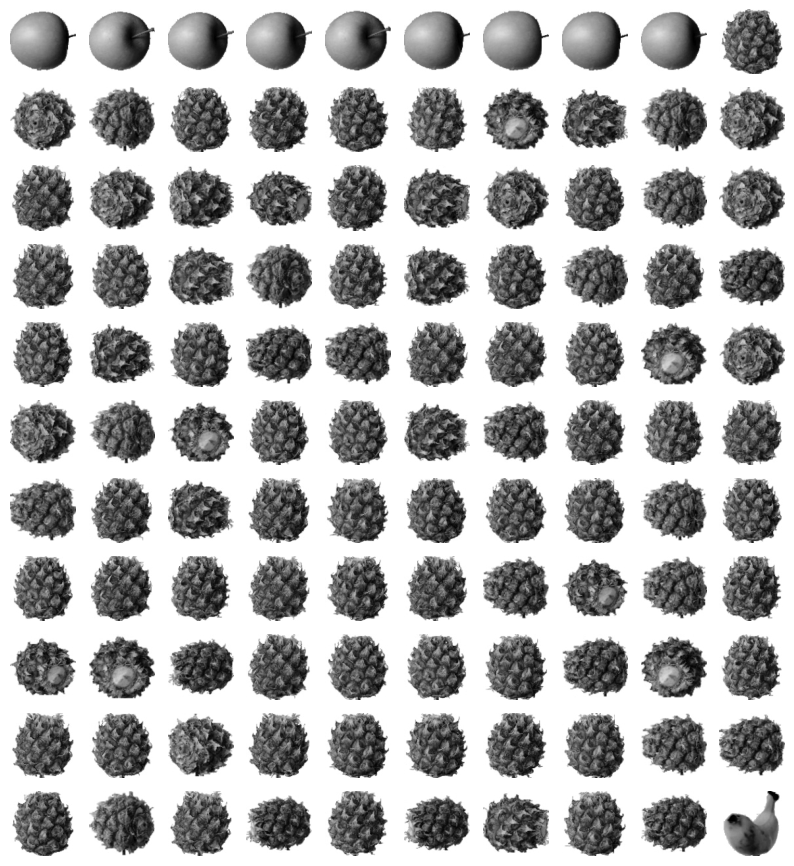

In [90]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

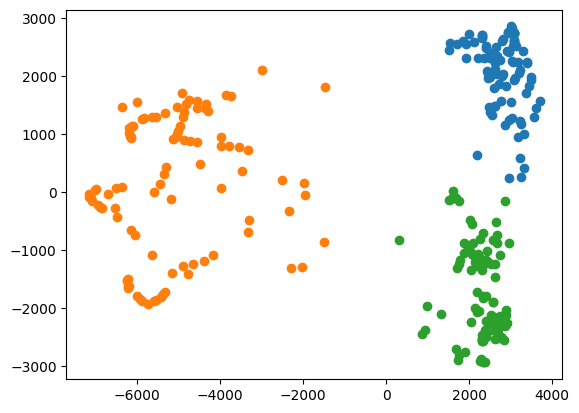

In [93]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.show()